In [15]:
# Data Cleaning and EDA Script
import pandas as pd, numpy as np
from pathlib import Path

# read raw data
RAW = Path("../data/raw/Salary_Data.csv")
df = pd.read_csv(RAW)

# cleaning: duplicates + missing values
df = df.drop_duplicates()

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = [c for c in df.columns if c not in num_cols]

for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna("Unknown")

print("After cleaning missing values:", df.shape)
display(df.isna().sum().sort_values(ascending=False).head(10))



After cleaning missing values: (325, 6)


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [16]:
# outlier removal on salary
salary_col = "Salary"

Q1, Q3 = df[salary_col].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

before = df.shape[0]
df = df[(df[salary_col] >= lower) & (df[salary_col] <= upper)]
after = df.shape[0]
print(f"Removed outliers: {before - after} rows | New shape: {df.shape}")


Removed outliers: 0 rows | New shape: (325, 6)


In [ ]:
print(df.dtypes)
print("\nTop job titles:")
print(df["Job Title"].value_counts().head(10))


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Top job titles:
Job Title
Director of Operations          9
Director of Marketing           8
Senior Marketing Manager        8
Senior Project Manager          7
Junior Financial Analyst        6
Senior Financial Analyst        6
Senior Business Analyst         6
Senior Data Scientist           6
Senior Operations Manager       5
Junior Marketing Coordinator    5
Name: count, dtype: int64

Top company locations:


KeyError: 'Company Location'

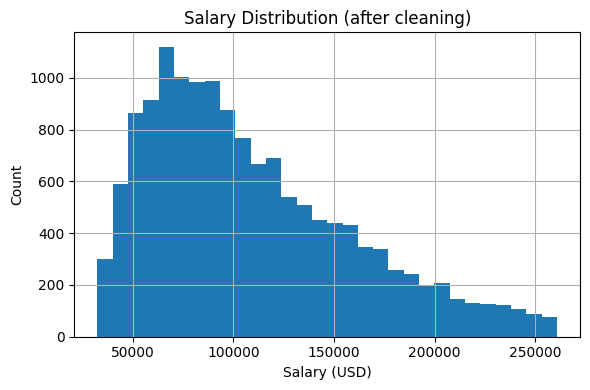

<Figure size 800x400 with 0 Axes>

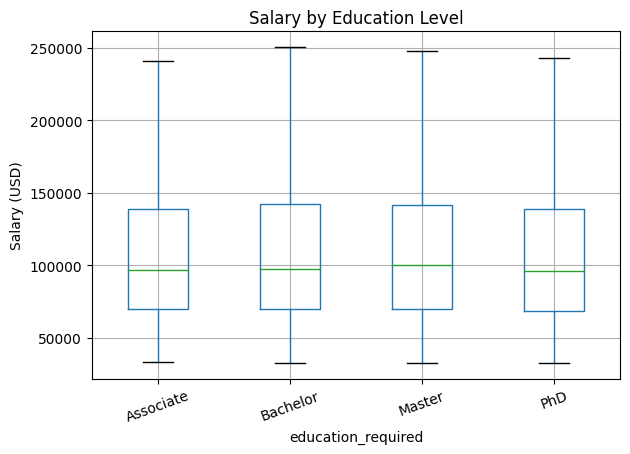

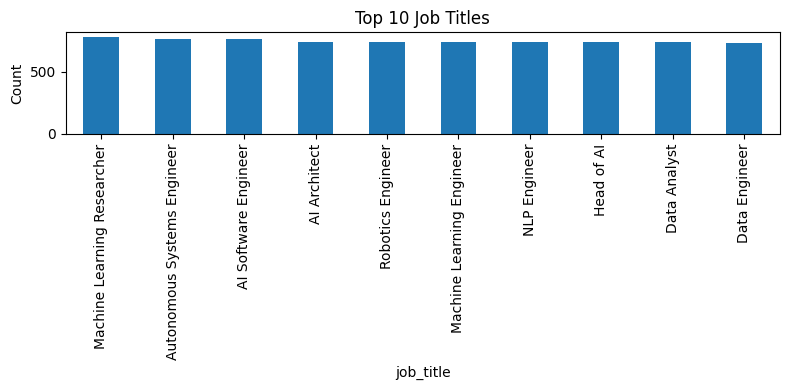

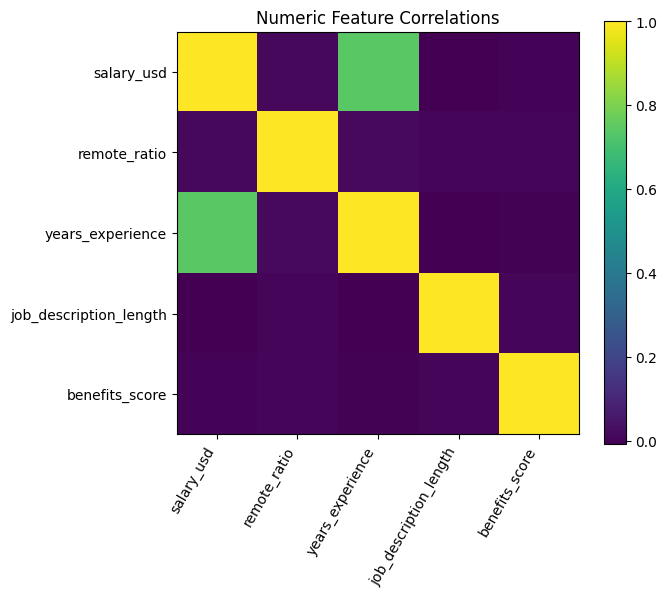

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

FIG = Path("../reports/figures"); FIG.mkdir(parents=True, exist_ok=True)

# Salary histogram
plt.figure(figsize=(6,4))
df[salary_col].hist(bins=30)
plt.title("Salary Distribution (after cleaning)")
plt.xlabel("Salary (USD)"); plt.ylabel("Count")
plt.tight_layout(); plt.savefig(FIG/"salary_hist.png"); plt.show()

# Salary by education (boxplot)
plt.figure(figsize=(8,4))
df.boxplot(column=salary_col, by="Education Level", showfliers=False, rot=20)
plt.title("Salary by Education Level"); plt.suptitle("")
plt.ylabel("Salary (USD)")
plt.tight_layout(); plt.savefig(FIG/"salary_by_education_box.png"); plt.show()

# Top 10 job titles bar chart
plt.figure(figsize=(8,4))
df["Job Title"].value_counts().head(10).plot(kind="bar")
plt.ylabel("Count"); plt.title("Top 10 Job Titles")
plt.tight_layout(); plt.savefig(FIG/"top_job_titles.png"); plt.show()

# Correlation heatmap for numeric features (optional)
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.figure(figsize=(7,6))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=60, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Numeric Feature Correlations")
plt.colorbar()
plt.tight_layout(); plt.savefig(FIG/"corr_heatmap.png"); plt.show()


In [ ]:
OUT = Path("../data/process/clean_salary_data.csv")
OUT.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(OUT, index=False)
print("Clean dataset saved at:", OUT)


Clean dataset saved at: ../data/process/clean_ai_salary_2025.csv


In [ ]:
summary = {
    "rows": len(df),
    "cols": df.shape[1],
    "salary_min": float(df[salary_col].min()),
    "salary_median": float(df[salary_col].median()),
    "salary_mean": float(df[salary_col].mean()),
    "salary_max": float(df[salary_col].max()),
}
summary


{'rows': 14517,
 'cols': 19,
 'salary_min': 32519.0,
 'salary_median': 97365.0,
 'salary_mean': 109246.60453261693,
 'salary_max': 260729.0}